In [ ]:
#Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster

In [ ]:
# From previous section
# Read csv file
final_df_ML = pd.read_csv('final_df_ML.csv')

# Separate the features (X) and the target (y)
# Features: 'Seq_Embedding' and 'Disease_Embedding'
# Target: 'Y'

X = final_df_ML[['Seq_Embedding', 'Disease_Embedding']]  
y = final_df_ML['Y']  

# Split into train + validation set and test set (80% train + validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train + validation set into train and validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the shape of the datasets
print(f'Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}')

Train shape: (31485, 2), Validation shape: (10495, 2), Test shape: (10496, 2)


## 2. Unsupervised Learning

Unsupervised analysis involves identifying hidden patterns and structures within datasets without the need for predefined labels or categories. Unlike approaches where data is pre-labeled, this method allows algorithms to explore intrinsic relationships within the data, grouping them into categories or reducing dimensionality. It is useful for uncovering hidden insights from large volumes of data and generating automatic insights without external intervention.

### Dimensionality Reduction

Working with high-dimensional data can present a number of challenges, such as increased computational complexity, greater risk of overfitting and difficulty interpreting the results.
As such, dimensionality reduction is a fundamental technique in machine learning, especially in problems with high dimensionality, where the number of variables or features is very large. This approach seeks to simplify the data set, keeping as much relevant information as possible, while eliminating redundancies and noise.

## PCA

PCA is a dimensionality reduction technique that transforms a set of possibly correlated variables into a new set of uncorrelated variables called principal components. It does this by identifying directions in the data space that capture the greatest possible variance, ordering these directions by importance. In this way, PCA makes it possible to represent the data in a lower-dimensional space, preserving as much information as possible.

In [ ]:
# Convert the strings to numeric arrays
X_train['Disease_Embedding'] = X_train['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
X_train['Seq_Embedding'] = X_train['Seq_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)

X_val['Disease_Embedding'] = X_val['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
X_val['Seq_Embedding'] = X_val['Seq_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)

X_test['Disease_Embedding'] = X_test['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
X_test['Seq_Embedding'] = X_test['Seq_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)

# Concatenate the sequence and disease embeddings
X_train_embeddings = np.hstack([X_train['Seq_Embedding'].tolist(), X_train['Disease_Embedding'].tolist()])
X_val_embeddings = np.hstack([X_val['Seq_Embedding'].tolist(), X_val['Disease_Embedding'].tolist()])
X_test_embeddings = np.hstack([X_test['Seq_Embedding'].tolist(), X_test['Disease_Embedding'].tolist()])

# Check the shape of the concatenated feature matrix
print(f'Shape of the feature matrix before PCA: {X_train_embeddings.shape}')

Shape da matriz de features antes do PCA: (31485, 868)


In [ ]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the explained variance
X_train_pca = pca.fit_transform(X_train_embeddings)
X_val_pca = pca.transform(X_val_embeddings)
X_test_pca = pca.transform(X_test_embeddings)

# Display results
print(f'Number of principal components retained: {X_train_pca.shape[1]}')
print(f'Train PCA shape: {X_train_pca.shape}, Validation PCA shape: {X_val_pca.shape}, Test PCA shape: {X_test_pca.shape}')

Número de componentes principais mantidos: 181
Train PCA shape: (31485, 181), Validation PCA shape: (10495, 181), Test PCA shape: (10496, 181)


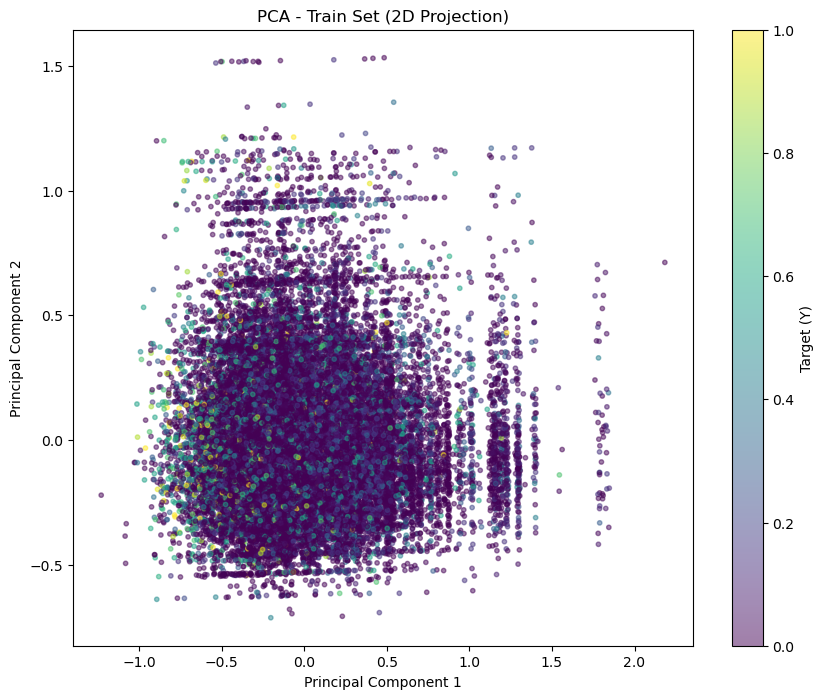

In [23]:
# Reduce to 2 principal components for visualization
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_embeddings)

# Plot 2D graph
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=10)
plt.colorbar(label='Target (Y)')
plt.title('PCA - Train Set (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  

t-SNE is a dimensionality reduction algorithm for visualizing high-dimensional data in 2D or 3D. It preserves local relationships by converting pairwise distances into probabilities and optimizing a low-dimensional representation to match these probabilities.  

The process involves:  
1. **Initialization:** Compute pairwise similarities in high-dimensional space using a Gaussian distribution.  
2. **Optimization:** Minimize divergence between high- and low-dimensional distributions, emphasizing local patterns.  
3. **Projection:** Represent the data in 2D or 3D, revealing clusters and relationships.  

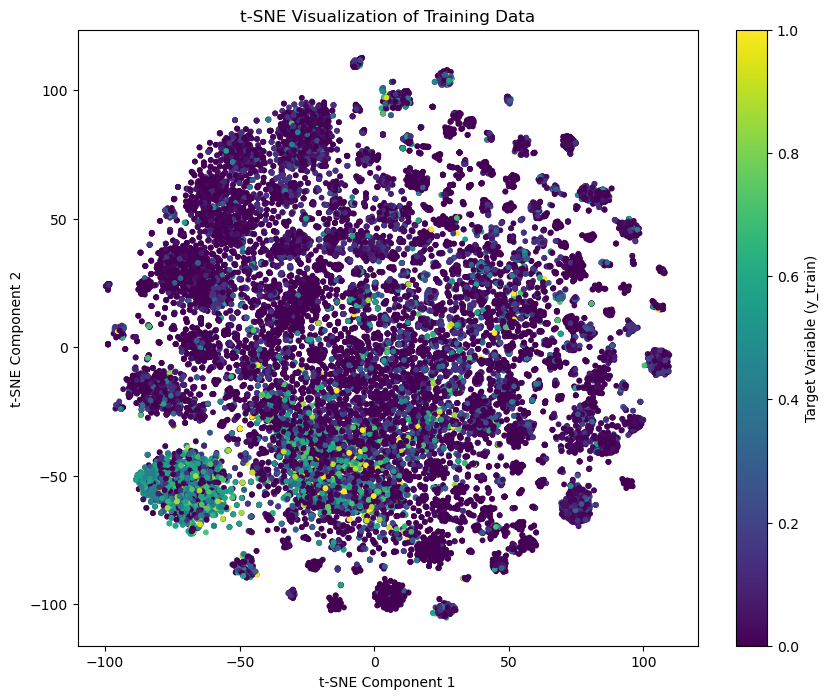

In [29]:
# Apply t-SNE on the PCA data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_train_tsne = tsne.fit_transform(X_train_pca)

# Visualization of t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', s=10)
plt.colorbar(label='Target Variable (y_train)')
plt.title('t-SNE Visualization of Training Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Despite using data with the dimensionality already reduced, it was only possible to obtain fuzzy groupings, i.e. the points appear less compactly distributed and with overlap between groups. This can happen for a number of reasons, ranging from the possible correlation of the input data, or the size of the dataset being insufficient. Even so, t-SNE proves to be a better visualization technique than PCA for our data.

However, by adjusting some hyperparameters such as Perplexity, it may be possible to achieve better results. This is because this parameter controls the balance between global and local sensitivity in t-SNE. Perplexities that are too high or too low can lead to less significant distributions. We then chose to use 3 different perplexity values [5, 30, 50] to see if it was possible to obtain clearer results.

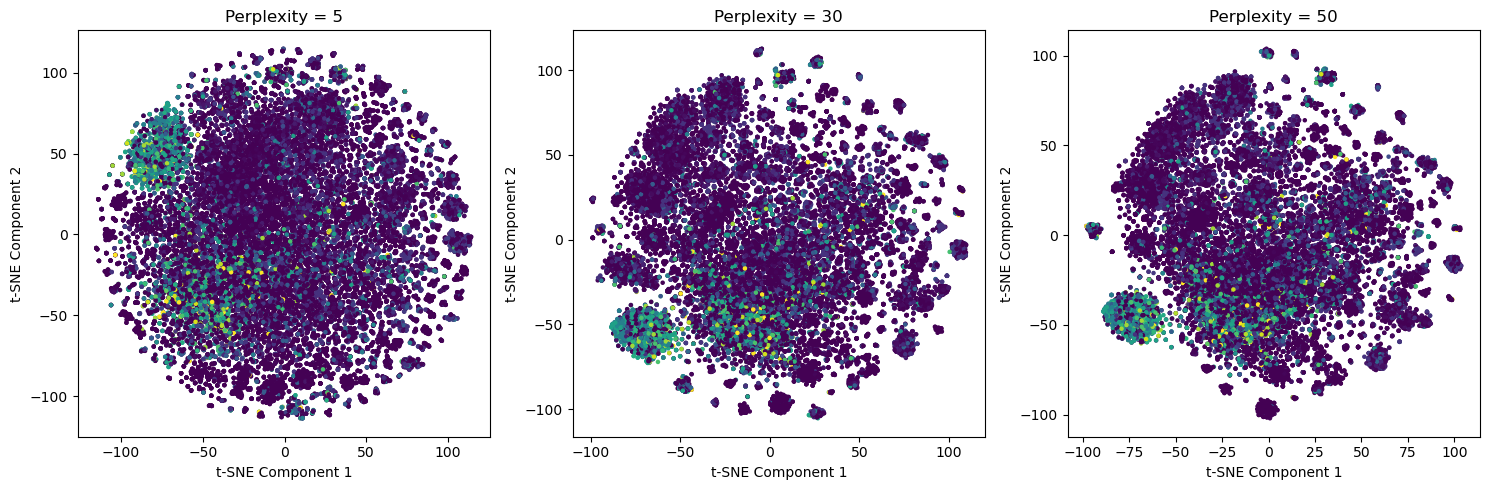

In [13]:
perplexities = [5, 30, 50]

plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(X_train_pca)
    
    plt.subplot(1, len(perplexities), i + 1)
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_train, cmap='viridis', s=5)
    plt.title(f'Perplexity = {perplexity}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

It can be seen that even with the modification of these hyperparameters, it was not possible to obtain a clear division of the groups.

### Clustering

Clustering is an unsupervised learning technique that identifies patterns and structure in data, grouping them into homogeneous clusters. It uses distance or similarity measures to group together nearby data points, seeking to maximize intra-cluster cohesion and inter-cluster separation. These clusters can reveal insights into the underlying structure of the data.
In this project, two clustering algorithms were addressed: **hierarchical clustering**, which builds a tree of clusters, where each node represents a cluster; **K-means**, which is a clustering algorithm that divides a data set into K clusters by minimizing the sum of the squares of the distances between the points and the centroids.

The module used for this analysis was **sklearn.cluster**

#### Hierarchical Clustering

To perform hierarchical clustering, we will follow these steps:

1. **Preprocessing**: Combine and normalize the "Disease_Embedding" and "vector" columns, which contain the numerical embeddings of disease and gene data, to create a feature matrix.  
2. **Distance Matrix Calculation**: Compute the distance matrix between the data points.  
3. **Applying Hierarchical Clustering Algorithm**: Use a hierarchical clustering method, such as SciPy's `linkage`.  
4. **Dendrogram Visualization**: Visualize the clustering results using a dendrogram.  

In [ ]:
#from torch import pdist
#distance_matrix = pdist(X_train_pca)

#Z = linkage(distance_matrix, method='ward')

#plt.figure(figsize=(15, 10))
#dendrogram(Z)
#plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Data Point Index')
#plt.ylabel('Distance')
#plt.show()

It is possible to see in the dendogram below that there are several small and very specific clusters. This could mean that there is a lot of noise in the data, high dimensionality despite the previous application of PCA, or inadequate adjustment of the ‘Linkage’ method. If the linkage method is not well adjusted to the data, the algorithm may over-divide the clusters into small branches. 

So we decided to try an approach in which we previously defined the number of clusters (20) to be displayed by the algorithm. This can be useful in interpreting the data due to clearer visualisation and also to avoid overfitting, i.e. so that the model doesn't make clusters that are too small and don't add value.

In [ ]:
#num_clusters = 20
#clusters = fcluster(Z, num_clusters, criterion='maxclust')

#plt.figure(figsize=(15, 10))
#dendrogram(
#    Z,
#    truncate_mode='lastp',  # Display only the last 'p' clusters
#    p=num_clusters,         # Number of clusters to display
#    leaf_rotation=90.,      # Rotation of the labels on the X axis
#    leaf_font_size=10.,     # Font size for the labels
#    show_contracted=True,   # Show contracted nodes
#    color_threshold=1500    # Set a threshold to color clusters
#)
#plt.title('Hierarchical Clustering Dendrogram (Enhanced)')
#plt.xlabel('Cluster or Data Point Index')
#plt.ylabel('Distance')

# Add a horizontal line to indicate the cluster cut-off
#plt.axhline(y=1500, color='r', linestyle='--', label='Threshold (Cut Level)')
#plt.legend()

#plt.show()

Although it's not possible to get much information from the fixed number of clusters, the previous graph gave a clearer visualisation of some of the possible clusters in the data.

#### Clustering K-Means

K-means is an unsupervised clustering algorithm widely used to group data into distinct clusters. The goal of K-means is to divide a dataset into K clusters in such a way that the data within the same cluster are as homogeneous as possible, while the data in different clusters are as distinct as possible.

The operation of K-means is based on the idea that the data can be represented by centroids, or central points, and that the distance between the data and its corresponding centroid should be minimized. The algorithm achieves this through an iterative process that follows three main steps:

- Initialization: The algorithm starts with the random selection of K central points (centroids) that will serve as the initial centers of the clusters. In this case, the number of clusters K is determined using the **elbow - method**, which helps identify the optimal number of clusters by analyzing the point where the reduction in inertia (sum of squared distances) begins to slow down.

- Assignment: Each data point is assigned to the nearest center, meaning each point is assigned to the cluster whose centroid is closest, based on a distance metric such as Euclidean distance.

- Update: After assigning the points to the clusters, the algorithm recalculates the position of the centroids as the average of the points belonging to each cluster.

In [ ]:
#from sklearn.cluster import KMeans
#sse = []
#k_range = range(1, 21)
#for k in k_range:
#    kmeans = KMeans(n_clusters=k, random_state=42)
#    kmeans.fit(X_train_pca)
#    sse.append(kmeans.inertia_)

# Plot the Elbow Method
#plt.figure(figsize=(10, 6))
#plt.plot(k_range, sse, 'bo-')
#plt.xlabel('Number of Clusters (k)')
#plt.ylabel('SSE')
#plt.title('Elbow Method for Determining the Number of Clusters')
#plt.show()

Analysing the chart, you can see that there is no well-defined ‘elbow’. As with the previous methods, this may once again mean that the data does not have well-defined groups, which means that there is no clear inflection point. This is because the SSE gradually decreases as more clusters are added.

________________________________________________________________________________________

##### **Não correr a partir daqui, resultados do ML já obtidos e registados para apresentação. Correr à posteriori para a entrega, demoram muitas horas a correr. Fica a faltar completar descrições e intrepretações.**

# Supervised Learning

Supervised learning is a type of machine learning where a model is trained using a labeled dataset, meaning that the inputs (features) are associated with known outputs or labels. The goal is to train the model to learn the mapping between inputs and their corresponding outputs, so that when exposed to new, unseen data, it can accurately predict or classify. This approach is commonly used in tasks such as classification (where the outputs are categories) and regression (where the outputs are continuous values). During training, the model's parameters are adjusted to minimize the difference between its predictions and the actual output values, typically using optimization techniques.

## Machine Learning

Machine Learning is a subset of artificial intelligence (AI) that focuses on building systems that learn from data and improve over time without being explicitly programmed. In ML, algorithms identify patterns in data and use those patterns to make predictions or decisions.

Explicação de quais modelos vamos explorar e que técnica vamos utilizar: treinar com os dados vindos do PCA, treinar com os dados originais, treinar sem otimização e treinar com otimização.

In [ ]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### Linear Regression

Breve explicação do LR.

##### LR with PCA data 

In [24]:
# Create the linear regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train_pca, y_train)

# Make predictions on the validation data
y_val_pred = model.predict(X_val_pca)

# Evaluate the model on the validation set
print(f'Mean Squared Error (MSE) on Validation Set: {mean_squared_error(y_val, y_val_pred)}')
print(f'R-squared on Validation Set: {r2_score(y_val, y_val_pred)}')

# Make predictions on the test set
y_test_pred = model.predict(X_test_pca)

# Evaluate the model on the test set
print(f'Mean Squared Error (MSE) on Test Set: {mean_squared_error(y_test, y_test_pred)}')
print(f'R-squared on Test Set: {r2_score(y_test, y_test_pred)}')

Mean Squared Error (MSE) on Validation Set: 0.027263581584429226
R-squared on Validation Set: 0.2365897738702124
Mean Squared Error (MSE) on Test Set: 0.027658817893412888
R-squared on Test Set: 0.2287841088920768


##### LR with original data

In [ ]:
# Create the linear regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train_embeddings, y_train)

# Make predictions on the validation data
y_val_pred = model.predict(X_val_embeddings)

# Evaluate the model on the validation set
print(f'Mean Squared Error (MSE) on Validation Set: {mean_squared_error(y_val, y_val_pred)}')
print(f'R-squared on Validation Set: {r2_score(y_val, y_val_pred)}')

# Make predictions on the test set
y_test_pred = model.predict(X_test_embeddings)

# Evaluate the model on the test set
print(f'Mean Squared Error (MSE) on Test Set: {mean_squared_error(y_test, y_test_pred)}')
print(f'R-squared on Test Set: {r2_score(y_test, y_test_pred)}')

### Ridge Regression

Breve explicação do RR.

##### RR with PCA data 

In [10]:
# Criar o modelo Ridge
ridge_model = Ridge(alpha=0.001, random_state=42)

# Treinar o modelo com os dados de treinamento
ridge_model.fit(X_train_pca, y_train)

# Fazer previsões no conjunto de validação
y_val_pred_ridge = ridge_model.predict(X_val_pca)

# Avaliar o modelo no conjunto de validação
print(f'Mean Squared Error (MSE) on Validation Set (Ridge): {mean_squared_error(y_val, y_val_pred_ridge)}')
print(f'R-squared on Validation Set (Ridge): {r2_score(y_val, y_val_pred_ridge)}')

# Fazer previsões no conjunto de teste
y_test_pred_ridge = ridge_model.predict(X_test_pca)

# Avaliar o modelo no conjunto de teste
print(f'Mean Squared Error (MSE) on Test Set (Ridge): {mean_squared_error(y_test, y_test_pred_ridge)}')
print(f'R-squared on Test Set (Ridge): {r2_score(y_test, y_test_pred_ridge)}')

Mean Squared Error (MSE) on Validation Set (Ridge): 0.027263573442803543
R-squared on Validation Set (Ridge): 0.23659000184467283
Mean Squared Error (MSE) on Test Set (Ridge): 0.027658805940598625
R-squared on Test Set (Ridge): 0.2287844421745886


##### RR with original data

In [ ]:
# Criar o modelo Ridge
ridge_model = Ridge(alpha=0.001, random_state=42)

# Treinar o modelo com os dados de treinamento
ridge_model.fit(X_train_embeddings, y_train)

# Fazer previsões no conjunto de validação
y_val_pred_ridge = ridge_model.predict(X_val_embeddings)

# Avaliar o modelo no conjunto de validação
print(f'Mean Squared Error (MSE) on Validation Set (Ridge): {mean_squared_error(y_val, y_val_pred_ridge)}')
print(f'R-squared on Validation Set (Ridge): {r2_score(y_val, y_val_pred_ridge)}')

# Fazer previsões no conjunto de teste
y_test_pred_ridge = ridge_model.predict(X_test_embeddings)

# Avaliar o modelo no conjunto de teste
print(f'Mean Squared Error (MSE) on Test Set (Ridge): {mean_squared_error(y_test, y_test_pred_ridge)}')
print(f'R-squared on Test Set (Ridge): {r2_score(y_test, y_test_pred_ridge)}')

##### RR with original data and optimization

In [ ]:
# Definir os parâmetros para busca
param_dist = {
    'alpha': np.logspace(-5, 5, 11)  # Testando valores de alpha entre 10^-5 e 10^5
}

# Criar o modelo Ridge
ridge_model = Ridge(random_state=42)

# Realizar a busca aleatória com validação cruzada
random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42)

# Treinar o modelo
random_search.fit(X_train_embeddings, y_train)

# Imprimir o melhor valor de alpha
print(f"Melhor valor de alpha: {random_search.best_params_['alpha']}")

# Obter o melhor modelo treinado
best_ridge_model = random_search.best_estimator_

# Fazer previsões com o modelo otimizado
y_val_pred_ridge = best_ridge_model.predict(X_val_embeddings)
y_test_pred_ridge = best_ridge_model.predict(X_test_embeddings)

# Avaliar o modelo otimizado
print(f'Mean Squared Error (MSE) on Validation Set (Ridge - Optimized): {mean_squared_error(y_val, y_val_pred_ridge)}')
print(f'R-squared on Validation Set (Ridge - Optimized): {r2_score(y_val, y_val_pred_ridge)}')

print(f'Mean Squared Error (MSE) on Test Set (Ridge - Optimized): {mean_squared_error(y_test, y_test_pred_ridge)}')
print(f'R-squared on Test Set (Ridge - Optimized): {r2_score(y_test, y_test_pred_ridge)}')

### DecisionTreeRegressor

Breve explicação do DT.

##### DT with PCA data

In [11]:
# Criar o modelo de Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Treinar o modelo com os dados de treino
dt_model.fit(X_train_pca, y_train)

# Fazer previsões no conjunto de validação
y_val_pred_dt = dt_model.predict(X_val_pca)

# Avaliar o modelo no conjunto de validação
print(f'Mean Squared Error (MSE) on Validation Set (Decision Tree): {mean_squared_error(y_val, y_val_pred_dt)}')
print(f'R-squared on Validation Set (Decision Tree): {r2_score(y_val, y_val_pred_dt)}')

# Fazer previsões no conjunto de teste
y_test_pred_dt = dt_model.predict(X_test_pca)

# Avaliar o modelo no conjunto de teste
print(f'Mean Squared Error (MSE) on Test Set (Decision Tree): {mean_squared_error(y_test, y_test_pred_dt)}')
print(f'R-squared on Test Set (Decision Tree): {r2_score(y_test, y_test_pred_dt)}')

Mean Squared Error (MSE) on Validation Set (Decision Tree): 0.055898027243293694
R-squared on Validation Set (Decision Tree): -0.5652061518719662
Mean Squared Error (MSE) on Test Set (Decision Tree): 0.05598259006346441
R-squared on Test Set (Decision Tree): -0.5609728242437497


##### DT with original data

In [ ]:
# Criar o modelo de Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Treinar o modelo com os dados de treino
dt_model.fit(X_train_embeddings, y_train)

# Fazer previsões no conjunto de validação
y_val_pred_dt = dt_model.predict(X_val_embeddings)

# Avaliar o modelo no conjunto de validação
print(f'Mean Squared Error (MSE) on Validation Set (Decision Tree): {mean_squared_error(y_val, y_val_pred_dt)}')
print(f'R-squared on Validation Set (Decision Tree): {r2_score(y_val, y_val_pred_dt)}')

# Fazer previsões no conjunto de teste
y_test_pred_dt = dt_model.predict(X_test_embeddings)

# Avaliar o modelo no conjunto de teste
print(f'Mean Squared Error (MSE) on Test Set (Decision Tree): {mean_squared_error(y_test, y_test_pred_dt)}')
print(f'R-squared on Test Set (Decision Tree): {r2_score(y_test, y_test_pred_dt)}')

##### DT with original data and optimization

In [ ]:
# Definir o espaço de hiperparâmetros para otimização
param_dist = {
    'max_depth': [None, 5, 10, 20, 30, 50],           # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10, 20],              # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4, 10],                # Número mínimo de amostras em uma folha
    'max_features': [None, 'auto', 'sqrt', 'log2'],   # Número de features a considerar ao procurar o melhor split
    'splitter': ['best', 'random']                    # Critério de divisão
}

# Criar o modelo DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

# Realizar a busca aleatória com validação cruzada
random_search_dt = RandomizedSearchCV(
    dt_model,
    param_distributions=param_dist,
    n_iter=20,              # Número de combinações a serem testadas
    cv=3,                   # Número de folds para validação cruzada
    scoring='neg_mean_squared_error',  # Usar o MSE como métrica (negativo para otimizar)
    random_state=42,
    n_jobs=-1               # Paralelizar em todos os núcleos disponíveis
)

# Treinar a busca de hiperparâmetros
random_search_dt.fit(X_train_embeddings, y_train)

# Obter os melhores hiperparâmetros
print(f"Melhores parâmetros encontrados: {random_search_dt.best_params_}")

# Usar o melhor modelo encontrado
best_dt_model = random_search_dt.best_estimator_

# Fazer previsões no conjunto de validação
y_val_pred_dt_optimized = best_dt_model.predict(X_val_embeddings)

# Avaliar o modelo no conjunto de validação
print(f'Mean Squared Error (MSE) on Validation Set (Optimized Decision Tree): {mean_squared_error(y_val, y_val_pred_dt_optimized)}')
print(f'R-squared on Validation Set (Optimized Decision Tree): {r2_score(y_val, y_val_pred_dt_optimized)}')

# Fazer previsões no conjunto de teste
y_test_pred_dt_optimized = best_dt_model.predict(X_test_embeddings)

# Avaliar o modelo no conjunto de teste
print(f'Mean Squared Error (MSE) on Test Set (Optimized Decision Tree): {mean_squared_error(y_test, y_test_pred_dt_optimized)}')
print(f'R-squared on Test Set (Optimized Decision Tree): {r2_score(y_test, y_test_pred_dt_optimized)}')

### RandomForestRegressor

Breve explicação do RFR.

##### RF with PCA data

In [27]:
# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the training data
rf_model.fit(X_train_pca, y_train)

# Make predictions on the validation data
y_val_pred_rf = rf_model.predict(X_val_pca)

# Evaluate the model on the validation set
print(f'Mean Squared Error (MSE) on Validation Set: {mean_squared_error(y_val, y_val_pred_rf)}')
print(f'R-squared on Validation Set: {r2_score(y_val, y_val_pred_rf)}')

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_pca)

# Evaluate the model on the test set
print(f'Mean Squared Error (MSE) on Test Set: {mean_squared_error(y_test, y_test_pred_rf)}')
print(f'R-squared on Test Set: {r2_score(y_test, y_test_pred_rf)}')

Mean Squared Error (MSE) on Validation Set: 0.026131499544000545
R-squared on Validation Set: 0.2682893142921031
Mean Squared Error (MSE) on Test Set: 0.02604025583118156
R-squared on Test Set: 0.2739147716683227


##### RF with original data

In [ ]:
# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the training data
rf_model.fit(X_train_embeddings, y_train)

# Make predictions on the validation data
y_val_pred_rf = rf_model.predict(X_val_embeddings)

# Evaluate the model on the validation set
print(f'Mean Squared Error (MSE) on Validation Set: {mean_squared_error(y_val, y_val_pred_rf)}')
print(f'R-squared on Validation Set: {r2_score(y_val, y_val_pred_rf)}')

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_embeddings)

# Evaluate the model on the test set
print(f'Mean Squared Error (MSE) on Test Set: {mean_squared_error(y_test, y_test_pred_rf)}')
print(f'R-squared on Test Set: {r2_score(y_test, y_test_pred_rf)}')

##### RF with original data and optimization

In [14]:
# Definir o espaço de hiperparâmetros para otimização
param_dist = {
    'n_estimators': [50, 100, 200, 500],          # Número de árvores
    'max_depth': [None, 10, 20, 30, 50],          # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],              # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],                # Número mínimo de amostras por folha
    'max_features': ['auto', 'sqrt', 'log2'],     # Número de features a serem consideradas ao procurar o melhor split
    'bootstrap': [True, False]                    # Se o bootstrap será usado ou não
}

# Criar o modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Realizar a busca aleatória com validação cruzada
random_search_rf = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=20,              # Número de combinações a serem testadas
    cv=3,                   # Número de folds para validação cruzada
    scoring='neg_mean_squared_error',  # Usar o MSE como métrica (negativo para otimizar)
    random_state=42,
    n_jobs=-1               # Paralelizar em todos os núcleos disponíveis
)

# Treinar a busca de hiperparâmetros
random_search_rf.fit(X_train_embeddings, y_train)

# Obter os melhores hiperparâmetros
print(f"Melhores parâmetros encontrados: {random_search_rf.best_params_}")

# Usar o melhor modelo encontrado
best_rf_model = random_search_rf.best_estimator_

# Fazer previsões no conjunto de validação
y_val_pred_rf_optimized = best_rf_model.predict(X_val_embeddings)

# Avaliar o modelo no conjunto de validação
print(f'Mean Squared Error (MSE) on Validation Set (Optimized RF): {mean_squared_error(y_val, y_val_pred_rf_optimized)}')
print(f'R-squared on Validation Set (Optimized RF): {r2_score(y_val, y_val_pred_rf_optimized)}')

# Fazer previsões no conjunto de teste
y_test_pred_rf_optimized = best_rf_model.predict(X_test_embeddings)

# Avaliar o modelo no conjunto de teste
print(f'Mean Squared Error (MSE) on Test Set (Optimized RF): {mean_squared_error(y_test, y_test_pred_rf_optimized)}')
print(f'R-squared on Test Set (Optimized RF): {r2_score(y_test, y_test_pred_rf_optimized)}')

### Suport Vector Regressor

Breve explicação do SVR.

##### SVR with PCA data

In [28]:
# Create the SVR model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train_pca, y_train)

# Make predictions
y_val_pred_svr = svr_model.predict(X_val_pca)
y_test_pred_svr = svr_model.predict(X_test_pca)

# Evaluate the model
print(f'Mean Squared Error (MSE) on Validation Set (SVR): {mean_squared_error(y_val, y_val_pred_svr)}')
print(f'R-squared on Validation Set (SVR): {r2_score(y_val, y_val_pred_svr)}')

print(f'Mean Squared Error (MSE) on Test Set (SVR): {mean_squared_error(y_test, y_test_pred_svr)}')
print(f'R-squared on Test Set (SVR): {r2_score(y_test, y_test_pred_svr)}')

Mean Squared Error (MSE) on Validation Set (SVR): 0.025881393669010946
R-squared on Validation Set (SVR): 0.2752925534663444
Mean Squared Error (MSE) on Test Set (SVR): 0.025672828448479783
R-squared on Test Set (SVR): 0.2841598167552021


##### SVR with original data

In [ ]:
# Create the SVR model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train_embeddings, y_train)

# Make predictions
y_val_pred_svr = svr_model.predict(X_val_embeddings)
y_test_pred_svr = svr_model.predict(X_test_embeddings)

# Evaluate the model
print(f'Mean Squared Error (MSE) on Validation Set (SVR): {mean_squared_error(y_val, y_val_pred_svr)}')
print(f'R-squared on Validation Set (SVR): {r2_score(y_val, y_val_pred_svr)}')

print(f'Mean Squared Error (MSE) on Test Set (SVR): {mean_squared_error(y_test, y_test_pred_svr)}')
print(f'R-squared on Test Set (SVR): {r2_score(y_test, y_test_pred_svr)}')

##### SVR with original data and optimization

In [ ]:
# Definir o espaço de hiperparâmetros para otimização com menos combinações
param_dist = {
    'C': [0.1, 1, 10],  # Testando apenas três valores para C
    'epsilon': [0.01, 0.1],  # Menos valores para epsilon
    'gamma': ['scale', 'auto'],  # Testando apenas dois valores para gamma
    'kernel': ['rbf']  # Testando apenas o kernel 'rbf'
}

# Criar o modelo SVR
svr_model = SVR()

# Realizar a busca aleatória com validação cruzada, mas com menos iterações e folds
random_search = RandomizedSearchCV(svr_model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=1)

# Treinar o modelo com a busca aleatória
random_search.fit(X_train_embeddings, y_train)

# Imprimir os melhores parâmetros encontrados
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")

# Obter o melhor modelo treinado
best_svr_model = random_search.best_estimator_

# Fazer previsões com o modelo otimizado
y_val_pred_svr_optimized = best_svr_model.predict(X_val_embeddings)
y_test_pred_svr_optimized = best_svr_model.predict(X_test_embeddings)

# Avaliar o modelo otimizado
from sklearn.metrics import mean_squared_error, r2_score

print(f'Mean Squared Error (MSE) on Validation Set (Optimized SVR): {mean_squared_error(y_val, y_val_pred_svr_optimized)}')
print(f'R-squared on Validation Set (Optimized SVR): {r2_score(y_val, y_val_pred_svr_optimized)}')

print(f'Mean Squared Error (MSE) on Test Set (Optimized SVR): {mean_squared_error(y_test, y_test_pred_svr_optimized)}')
print(f'R-squared on Test Set (Optimized SVR): {r2_score(y_test, y_test_pred_svr_optimized)}')